In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 1 - Fetching Asset's Data 
The below cell retrieves historical data for the S&P 500 index (using the ^GSPC ticker) from 2020-01-01 to 2025-01-01 via the yfinance library, flattens any multi-level columns for clarity, and then inspects the resulting DataFrame by summarizing its structure (.info()) and previewing its first ten rows (.head(10)).

In [3]:
ticker = "^GSPC"
data = yf.download(ticker, start ="2020-01-01", end ="2025-01-01")
data.columns = [col[0] if isinstance(col, tuple) else col for col in data.columns]
data.info()
data.head(10)       

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Open    1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,3257.850098,3258.139893,3235.530029,3244.669922,3459930000
2020-01-03,3234.850098,3246.149902,3222.340088,3226.360107,3484700000
2020-01-06,3246.280029,3246.840088,3214.639893,3217.550049,3702460000
2020-01-07,3237.179932,3244.909912,3232.429932,3241.860107,3435910000
2020-01-08,3253.050049,3267.070068,3236.669922,3238.590088,3726840000
2020-01-09,3274.699951,3275.580078,3263.669922,3266.030029,3641230000
2020-01-10,3265.350098,3282.989990,3260.860107,3281.810059,3214580000
2020-01-13,3288.129883,3288.129883,3268.429932,3271.129883,3459390000
2020-01-14,3283.149902,3294.250000,3277.189941,3285.350098,3687620000


# 2 - Calculating Drawdown
This cell forward-fills any missing Close values to ensure data continuity, computes the running maximum price (RunningMax), then calculates the drawdown at each point in time as the relative drop from this running peak. Finally, it identifies the most negative drawdown (i.e., max_drawdown) over the entire period and prints it as a percentage, providing insight into the worst peak-to-trough decline for the S&P 500 within the specified date range.

In [7]:
data['Close'] = data['Close'].ffill()
data['RunningMax'] = data['Close'].cummax()
data['Drawdown'] = data['Close']/data['RunningMax'] - 1.0
max_drawdown = data['Drawdown'].min()
print(f"Maximum Drawdown for {ticker}: {max_drawdown:.2%}")

Maximum Drawdown for ^GSPC: -33.92%


# 3 - Visualisation
These commands create two plots: first, a time series chart showing the daily closing value of the S&P 500 (with a grid, labels, and legend), and second, a drawdown chart that highlights periods when the index is below its running maximum. The fill between the drawdown and zero emphasizes the periods and severity of the drawdowns, helping visualize the index's peak-to-trough declines over time.

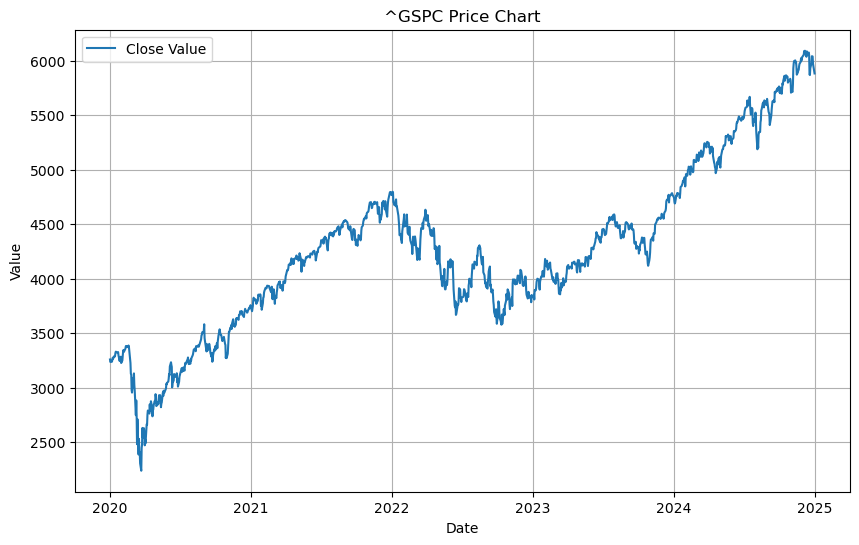

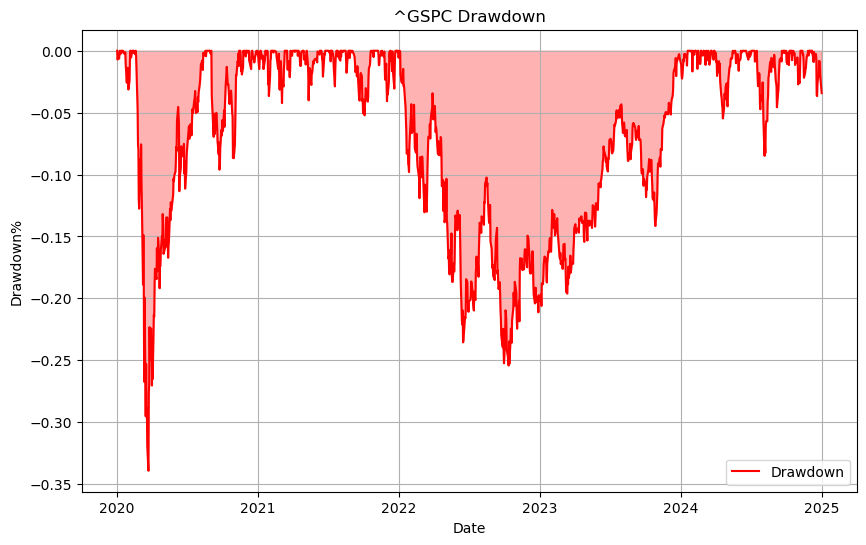

In [9]:
# Plot price
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close Value')
plt.grid()
plt.title(f'{ticker} Price Chart')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot drawdown
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Drawdown'], label='Drawdown', color='red')
plt.fill_between(data.index, data['Drawdown'], 0, color='red', alpha=0.3)
plt.title(f'{ticker} Drawdown')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Drawdown%')
plt.legend()
plt.show()